# Introducing Pitching Efficiency, a new metrics to evaluate pitcher performance

by Chung-Hao Lee </br>
March 25, 2022

### Introduction

The original idea was inspired by Moneyball, the film in 2011. In the film, Paul DePodesta (a baseball analyst) told Billy Beane (a general manager) that the most important metric in baseball was outs. Every baseball team only has 27 outs in a game. Who scores higher before 27 outs win. That's why after the conversation, Oakland Athletics (the Moneyball team) valued on-base percentage (OBP) the most because OBP is a metric to evaluate how good a hitter can get on base before the outs.

As more and more advanced metrics to evaluate hitters' performance, however, metrics evaluating pitchers' performance so far is more focusing on the run instead of out. ERA and FIP, two iconic metrics used in baseball analytics, are all related to run. To my knowledge, there are no metrics to evaluate pitchers' performance based on out. 

Here, I introduce Pitching Efficiency (PE), a new metric to evaluate pitcher performance.

Formula of Pitiching Efficiency:

$\frac{1}{\frac{pitches}{\frac{outs}{1+TB}}}*100$

= $\frac{\frac{outs}{1+TB}}{pitches}*100$

Where pitches mean how many balls a pitcher throws. TB (Total Bases) means how many bases are allowed by a pitcher. Outs mean how many outs are earned by a pitcher. Normally, Websites (such as Baseball-reference, Fangraphs) only have IP. I calculated outs by using the formula: (full number of IP)*3 + (decimal of IP)*10.

Quality of out is different. For example, A earns two outs with 0 bases allowed. B also earns two outs but with 1 base allowed. In this case, we can say that A has a better quality out than B because A doesn't have any base allowed. That's why in the formula of Pitching Efficiency, I use $\frac{outs}{1+TB}$ to reflect the quality of out. </br>
$\frac{pitches}{\frac{outs}{1+TB}}$ reflects how many balls a pitcher needs to throw to earn a quality out. Usually fewer pitches per quality out mean better a pitcher is. Here I used multiplicative inverse because after inversion numbers of Pitching Efficiency can fall between 0 and 1, and the larger the number the better a pitcher. I also timed 100 to numbers of Pitching Efficiency because that's easier to read.

### Data Processing

In [1]:
# Loading libraries
import pandas as pd # for data processing
import numpy as np # for data processing
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
from matplotlib.lines import Line2D # for data visualization

%matplotlib inline



All data are collected from https://www.baseball-reference.com/ and https://www.fangraphs.com/. </br>
I set the qualification filter is IP > 50. 

In [2]:
# Loading data collected from https://www.fangraphs.com/.
fang_2021 = pd.read_csv("2021_fang.csv", index_col=False)
fang_2020 = pd.read_csv("2020_fang.csv", index_col=False)
fang_2019 = pd.read_csv("2019_fang.csv", index_col=False)
fang_2018 = pd.read_csv("2018_fang.csv", index_col=False)
fang_2017 = pd.read_csv("2017_fang.csv", index_col=False)
fang_2016 = pd.read_csv("2016_fang.csv", index_col=False)
fang_2015 = pd.read_csv("2015_fang.csv", index_col=False)



In [3]:
# Loading data collected from https://www.baseball-reference.com/.
br_2021 = pd.read_csv("2021_batting_against.csv", index_col=False)
br_2020 = pd.read_csv("2020_batting_against.csv", index_col=False)
br_2019 = pd.read_csv("2019_batting_against.csv", index_col=False)
br_2018 = pd.read_csv("2018_batting_against.csv", index_col=False)
br_2017 = pd.read_csv("2017_batting_against.csv", index_col=False)
br_2016 = pd.read_csv("2016_batting_against.csv", index_col=False)
br_2015 = pd.read_csv("2015_batting_against.csv", index_col=False)



In [4]:
# Merge data from baseball-reference and fangraphs
df_2021 = pd.merge(fang_2021, br_2021, how = "left", left_on='id', right_on='id')
df_2020 = pd.merge(fang_2020, br_2020, how = "left", left_on='id', right_on='id')
df_2019 = pd.merge(fang_2019, br_2019, how = "left", left_on='id', right_on='id')
df_2018 = pd.merge(fang_2018, br_2018, how = "left", left_on='id', right_on='id')
df_2017 = pd.merge(fang_2017, br_2017, how = "left", left_on='id', right_on='id')
df_2016 = pd.merge(fang_2016, br_2016, how = "left", left_on='id', right_on='id')
df_2015 = pd.merge(fang_2015, br_2015, how = "left", left_on='id', right_on='id')



In [5]:
# Assign year to each year data
df_2021['year'] = 2021
df_2020['year'] = 2020
df_2019['year'] = 2019
df_2018['year'] = 2018
df_2017['year'] = 2017
df_2016['year'] = 2016
df_2015['year'] = 2015


In [6]:
# Define if a pitcher belongs to starting pitcher. If a pitcher has record of game start, I define him as a SP, otherwise, not a SP.
df_2021['SP'] =  df_2021['GS'].map(lambda x: 'y' if x >0 else 'n')
df_2020['SP'] =  df_2020['GS'].map(lambda x: 'y' if x >0 else 'n')
df_2019['SP'] =  df_2019['GS'].map(lambda x: 'y' if x >0 else 'n')
df_2018['SP'] =  df_2018['GS'].map(lambda x: 'y' if x >0 else 'n')
df_2017['SP'] =  df_2017['GS'].map(lambda x: 'y' if x >0 else 'n')
df_2016['SP'] =  df_2016['GS'].map(lambda x: 'y' if x >0 else 'n')
df_2015['SP'] =  df_2015['GS'].map(lambda x: 'y' if x >0 else 'n')


In [7]:
# Convert datatype of Hard% from string to float for better exploration in data visualization.
df_2021['Hard%'] = df_2021['Hard%'].str.split('%').str[0].astype(float)
df_2020['Hard%'] = df_2020['Hard%'].str.split('%').str[0].astype(float)
df_2019['Hard%'] = df_2019['Hard%'].str.split('%').str[0].astype(float)
df_2018['Hard%'] = df_2018['Hard%'].str.split('%').str[0].astype(float)
df_2017['Hard%'] = df_2017['Hard%'].str.split('%').str[0].astype(float)
df_2016['Hard%'] = df_2016['Hard%'].str.split('%').str[0].astype(float)
df_2015['Hard%'] = df_2015['Hard%'].str.split('%').str[0].astype(float)



In [8]:
# Combine all tables into one dataset
df = pd.concat([df_2021, df_2020, df_2019, df_2018, df_2017, df_2016, df_2015])



In [9]:
# Define "K/BB", a metric to measure how good a pitcher to control pitching.
df['K/BB'] = df['SO'] / df['BB']


In [10]:
# Define "out". Please see the formula and explanation of "out" in Introduction.
df['outs'] = (df['IP_x'] - df['IP_x']%1)*3 + (df['IP_x']%1)*10



In [11]:
# Define "Pitching Efficiency". Please see the formula and explanation of "Pitching Efficiency" in Introduction.
df['Pitching Efficiency'] = ((df['outs'] / (1 + df['TB'])) / df['Pitches'])*100



In [12]:
# Browse the dataset
df



,id,Name_x,Team,BABIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,...,vSL,vCU,vCS,vKN,vSB,IP.2,playerid.3,K/BB,outs,Pitching Efficiency
0,1,A.J. Minter,ATL,0.298,1.31,20.70%,45.00%,34.30%,6.30%,4.20%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.850000,157.0,0.259745
1,2,Aaron Bummer,CHW,0.298,6.00,11.20%,76.10%,12.70%,11.80%,17.60%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.586207,169.0,0.331464
2,3,Aaron Civale,CLE,0.249,1.21,17.80%,45.00%,37.20%,8.20%,17.20%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.193548,373.0,0.095780
3,4,Aaron Loup,NYM,0.257,1.89,23.00%,50.40%,26.60%,0.00%,2.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.562500,170.0,0.434216
4,5,Aaron Nola,PHI,0.308,1.00,19.00%,40.50%,40.50%,10.90%,13.50%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.717949,542.0,0.064463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,325,Yusmeiro Petit,SFG,0.278,0.71,21.30%,32.60%,46.00%,9.10%,10.00%,...,NaN,77.9,NaN,NaN,NaN,76.0,4020.0,3.933333,228.0,0.152737
325,326,Zach Duke,CHW,0.262,2.38,17.20%,58.30%,24.50%,5.40%,24.30%,...,82.5,76.4,NaN,NaN,NaN,60.2,3840.0,2.062500,182.0,0.198666
326,327,Zach McAllister,CLE,0.346,1.21,20.90%,43.30%,35.80%,9.00%,10.40%,...,NaN,81.9,NaN,NaN,NaN,69.0,2895.0,3.652174,207.0,0.162879
327,328,Zack Britton,BAL,0.308,8.33,11.40%,79.10%,9.50%,0.00%,20.00%,...,NaN,84.3,NaN,NaN,NaN,65.2,3240.0,5.642857,197.0,0.315827


So far, it looks quite good. All tables were combined into a dataset. Pitching Efficiency was also added to the dataset.</br>
Let's do data visualization and explore the Pitching Efficiency.


### Data Visualiztion

90 percentile of Pitching Efficiency: 0.26
75 percentile of Pitching Efficiency: 0.21
Median of Pitching Efficiency:        0.14
25 percentile of Pitching Efficiency: 0.08
10 percentile of Pitching Efficiency: 0.07


/Users/yginger/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='year', ylabel='Pitching Efficiency'>

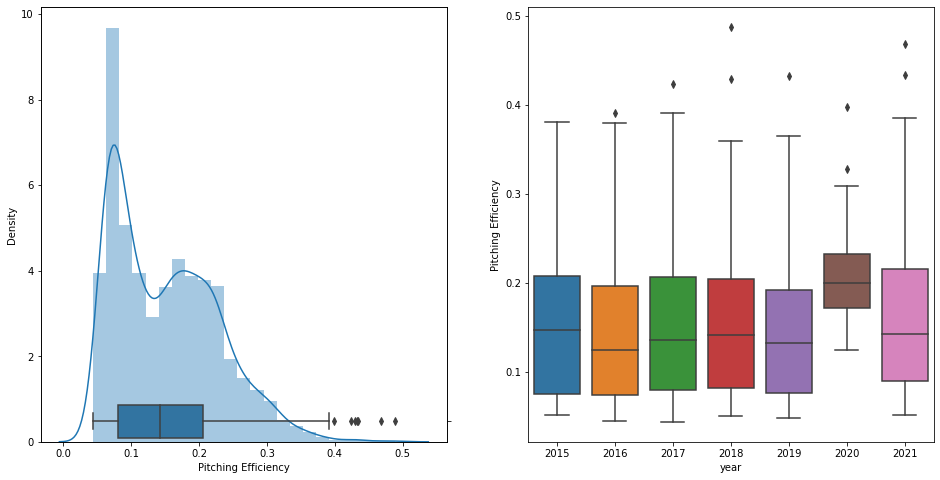

In [13]:
# Explore Pitching Efficiency's frequency and yearly changing.
x=df['Pitching Efficiency']
median = np.quantile(x, 0.5).round(2)
q_25 = np.quantile(x, 0.25).round(2)
q_75 = np.quantile(x, 0.75).round(2)
q_90 = np.quantile(x, 0.90).round(2)
q_10 = np.quantile(x, 0.10).round(2)
print('90 percentile of Pitching Efficiency: ' + str(q_90))
print('75 percentile of Pitching Efficiency: ' + str(q_75))
print('Median of Pitching Efficiency:        ' + str(median))
print('25 percentile of Pitching Efficiency: ' + str(q_25))
print('10 percentile of Pitching Efficiency: ' + str(q_10))

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))
g = sns.distplot(ax = ax1, x=df['Pitching Efficiency'])
g.set(xlabel = 'Pitching Efficiency')
ax3 = g.twinx()
sns.boxplot(x=x, ax=ax3)
ax3.set(ylim=(-.5, 10))

sns.boxplot(ax = ax2, x=df['year'], y=df['Pitching Efficiency'])



* We can see that the range of Pitching Efficiency (PE) from 2015 to 2021 is 0 to 0.5 and most Pitching Efficiency fall near 0.1. </br>
90 percentile is at 0.26. If a pitcher's PE is greater than 0.26, we define him as a great pitcher.</br>
75 percentile is at 0.21. If a pitcher's PE is greater than 0.21, we define him as a good pitcher.</br>
Median is at 0.14. If a pitcher's PE is greater than 0.14, we define him as an average pitcher.</br>
25 percentile is at 0.08. If a pitcher's PE is greater than 0.08, we define him as a below-average pitcher.</br>
10 percentile is at 0.07. If a pitcher's PE is greater than 0.07, we define him as a not-good pitcher.</br>

* Besides 2020, the short season due to COVID-19, PE are in the similar rage through years. We can say that PE is a stable metric. 

In [14]:
# Create regplot with hue function
def hue_regplot(data, x, y, hue, palette=None, **kwargs):
    from matplotlib.cm import get_cmap
    
    regplots = []
    
    levels = data[hue].unique()

    if palette is None:
        default_colors = get_cmap('tab10')
        palette = {k: default_colors(i) for i, k in enumerate(levels)}
    
    for key in levels:
        regplots.append(
            sns.regplot(
                x=x,
                y=y,
                data=data[data[hue] == key],
                color=palette[key],
                **kwargs 
   
            )
        )
    
    return regplots

[<AxesSubplot:xlabel='Pitching Efficiency', ylabel='xERA'>,
 <AxesSubplot:xlabel='Pitching Efficiency', ylabel='xERA'>]

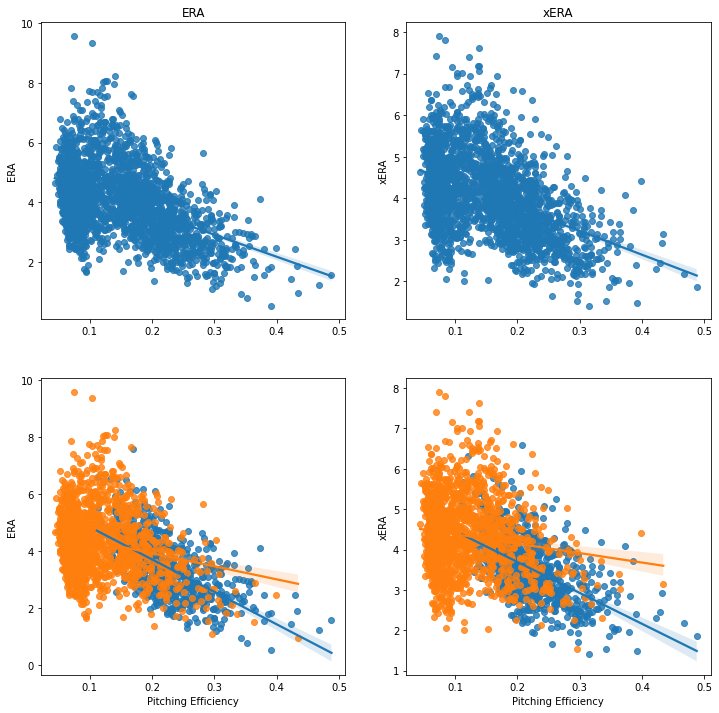

In [15]:
# Explore relationship between PE and ERA, xERA.
fig, axs = plt.subplots(2,2, figsize=(12, 12))
sns.regplot(ax=axs[0,0], data = df, x='Pitching Efficiency', y='ERA')
axs[0, 0].set_title("ERA")
axs[0, 0].set(xlabel=None)
sns.regplot(ax=axs[0,1], data = df, x='Pitching Efficiency', y='xERA')
axs[0, 1].set_title("xERA")
axs[0, 1].set(xlabel=None)
hue_regplot(ax=axs[1,0], data = df, x='Pitching Efficiency', y='ERA', hue = 'SP')
hue_regplot(ax=axs[1,1], data = df, x='Pitching Efficiency', y='xERA', hue = 'SP')



xERA is expected ERA. Detailed explanation can go to https://www.mlb.com/glossary/statcast/expected-era.

ERA is the most iconic metric to measure a pitcher's performance. Lower ERA better a pitcher is. 

From the top two plots, we can see that as PE goes higher, both ERA and xERA go lower. This means if a pitcher have more efficiency, he will have lower ERA or xERA.

From the bottom two plots, we can see that as we seperate starting pitchers (orange) and relievers (blue), relievers has more negative correlation between ERA or xERA and PE. 


[<AxesSubplot:xlabel='Pitching Efficiency', ylabel='xFIP'>,
 <AxesSubplot:xlabel='Pitching Efficiency', ylabel='xFIP'>]

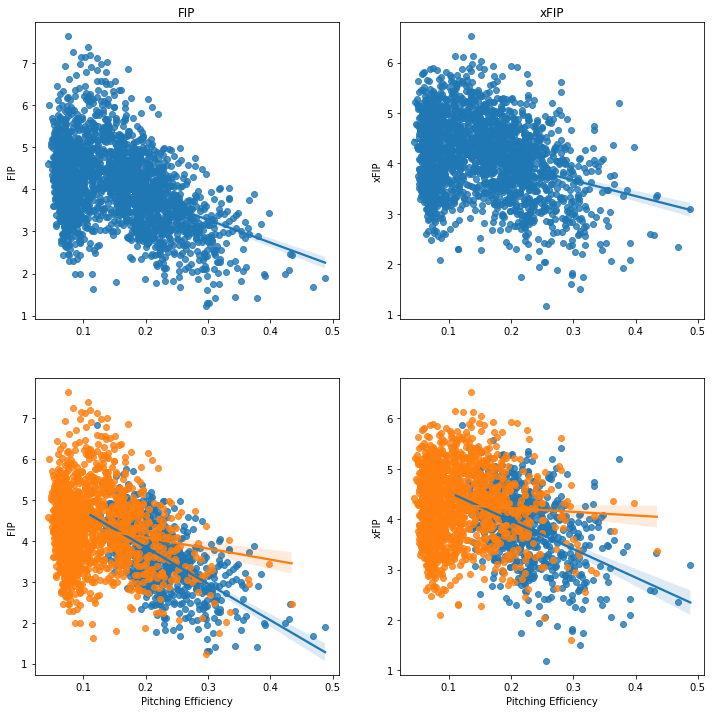

In [16]:
# Explore relationship between PE and FIP, xFIP.
fig, axs = plt.subplots(2,2, figsize=(12, 12))
sns.regplot(ax=axs[0,0], data = df, x='Pitching Efficiency', y='FIP')
axs[0, 0].set_title("FIP")
axs[0, 0].set(xlabel=None)
sns.regplot(ax=axs[0,1], data = df, x='Pitching Efficiency', y='xFIP')
axs[0, 1].set_title("xFIP")
axs[0, 1].set(xlabel=None)
hue_regplot(ax=axs[1,0], data = df, x='Pitching Efficiency', y='FIP', hue = 'SP')
hue_regplot(ax=axs[1,1], data = df, x='Pitching Efficiency', y='xFIP', hue = 'SP')


xFIP is expected FIP. Detailed explanation can go to https://www.mlb.com/glossary/advanced-stats/expected-fielding-independent-pitching

FIP is another the most iconic metric to measure a pitcher's performance. Lower FIP better a pitcher is. 

Compared to ERA, FIP only count SO, BB and HR. This can remove defense effect to a pitcher.

From the top two plots, we can see that as PE goes higher, both FIP and xFIP go lower. This means if a pitcher have more efficiency, he will have lower FIP or xFIP.

From the bottom two plots, we can see that as we seperate starting pitchers (orange) and relievers (blue), relievers has more negative correlation between FIP or xFIP and PE. 


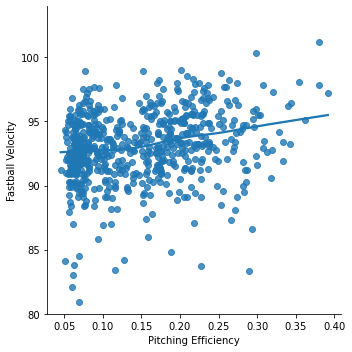

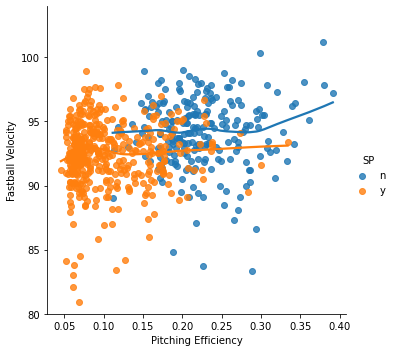

In [17]:
# Explore relationship between PE and fastball velocity.
g1 = sns.lmplot(data = df, x='Pitching Efficiency', y='vFA', lowess=True)
g1.set(ylim=(80, None), ylabel='Fastball Velocity')
g = sns.lmplot(data = df, x='Pitching Efficiency', y='vFA', hue = 'SP', lowess=True)
g.set(ylim=(80, None), ylabel='Fastball Velocity')


Fastball velocity is one of metric to measure quality of a pitch. Faster pitch is harder to hit.
A better pitcher (higher PE) could have higher fastball velocity.
These figures show that higher PE has higher fastball velocity. Reliever has more positive correlation between PE and fastball velocity.

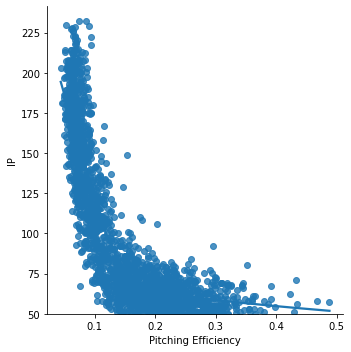

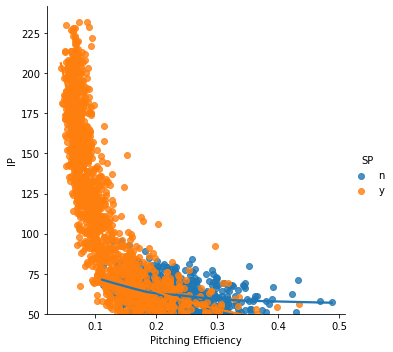

In [18]:
# Explore relationship between PE and IP.
g1 = sns.lmplot(data = df, x='Pitching Efficiency', y='IP_x', lowess=True)
g1.set(ylim=(50, None), ylabel='IP')
g = sns.lmplot(data = df, x='Pitching Efficiency', y='IP_x', hue = 'SP', lowess=True)
g.set(ylim=(50, None), ylabel='IP')


These figures explore the relationship between IP (pitch innings) and PE. To my surprise, IP and PE have a negative correlation. My original thought was because high PE means a pitcher can use fewer pitches to get quality out, therefore high PE pitchers should have higher IP. 

However, these figures show the opposite results to my original thought. I believe there are two reasons to explain. </br>
First, high PE pitchers are valuable. Baseball franchises value these pitchers and won't allow these pitchers to have too many innings. In other words, baseball franchises protect high PE pitchers to prevent injury. </br>
Second, most high PE pitchers are pitchers who can throw very fast. For example, for relievers, Jose Leclerc whose PE was 0.49 in 2018 can throw an average of 95mph fastball. Josh Hader whose PE was 0.47 in 2021 can throw an average 96mph fastball. For SP, Taylor Glasnow whose PE was 0.34 in 2019 can throw average 97mph fastball.

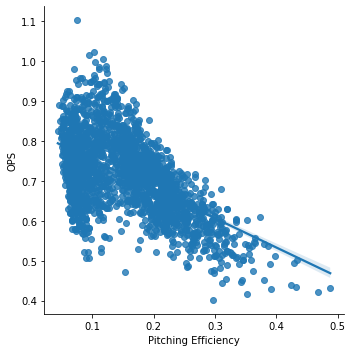

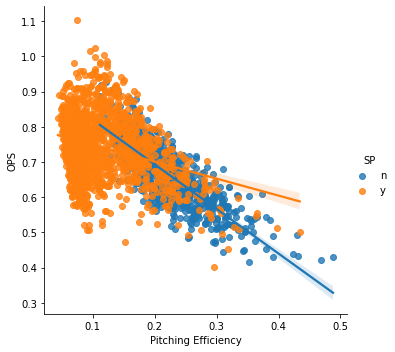

In [19]:
# Explore relationship between PE and OPS batting against.
sns.lmplot(data = df, x='Pitching Efficiency', y='OPS')
sns.lmplot(data = df, x='Pitching Efficiency', y='OPS', hue = 'SP')

OPS batting against is another metric to measure pitcher's performance. 

A better pitcher (higher PE) should have lower OPS batting against. </br>
These figures show that higher PE has lower OPS. 
Reliever has more negative correlation between PE and OPS.


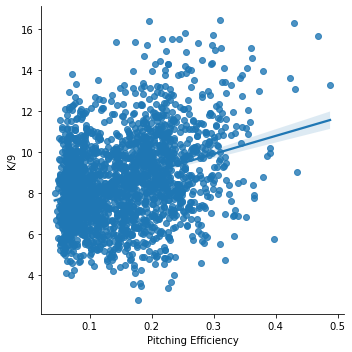

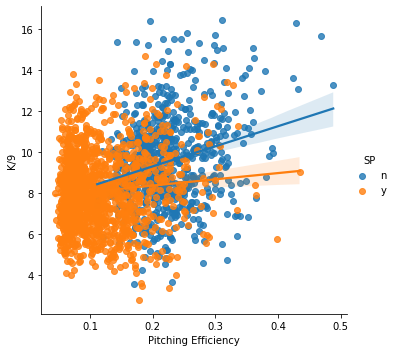

In [20]:
# Explore relationship between PE and K/9.
sns.lmplot(data = df, x='Pitching Efficiency', y='K/9')
sns.lmplot(data = df, x='Pitching Efficiency', y='K/9', hue = 'SP')

K/9 means how many strikeouts a pitcher can get in 9 innings. Higher K/9 means a pitcher has more powerful pitches to retire hitter.

A better pitcher (higher PE) should have higher K/9. </br>
These figures show that higher PE has higher K/9. 
Reliever has more positive correlation between PE and K/9.

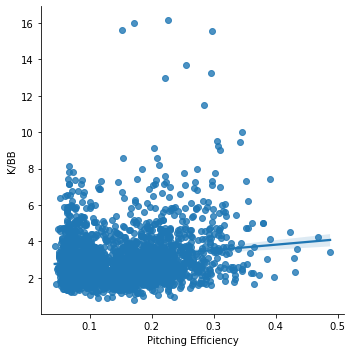

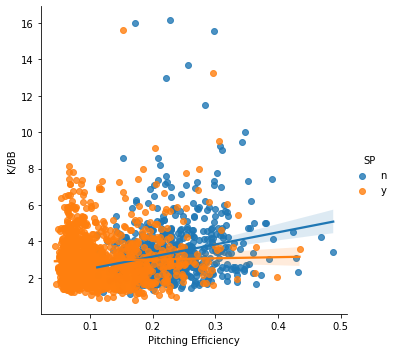

In [21]:
# Explore relationship between PE and K/9.
sns.lmplot(data = df, x='Pitching Efficiency', y='K/BB')
sns.lmplot(data = df, x='Pitching Efficiency', y='K/BB', hue = 'SP')



K/BB means how many strikeouts a pitcher can get per walk he giving. Higher K/BB means a pitcher has good control on his pitching.

A better pitcher (higher PE) should have higher K/BB.
These figures show that PE has slightly positive correlation with K/BB. Higher PE have slightly higher K/BB. 

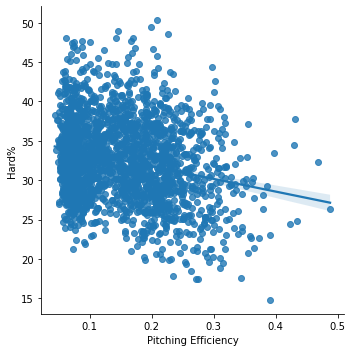

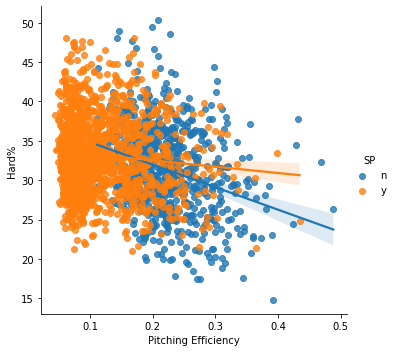

In [22]:
# Explore relationship between PE and Hard%.
sns.lmplot(data = df, x='Pitching Efficiency', y='Hard%')
sns.lmplot(data = df, x='Pitching Efficiency', y='Hard%', hue = 'SP')

Hard% means high quality of contact by a hitter. Detailed explanation can go to https://library.fangraphs.com/offense/quality-of-contact-stats/.

A better pitcher (higher PE) should have lower Hard%.
These figures show that higher PE has lower Hard%. 
Reliever has more negative correlation between PE and Hard%.

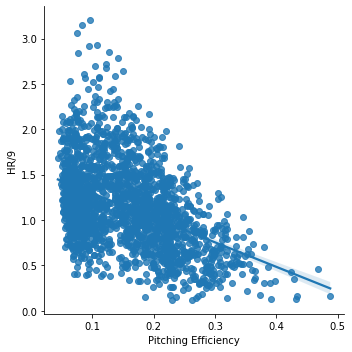

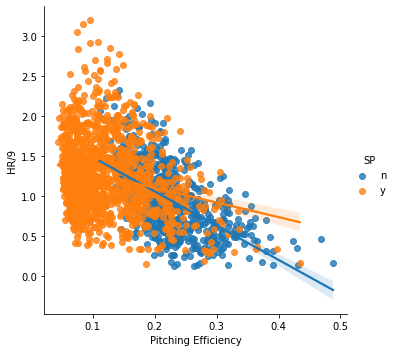

In [23]:
# Explore relationship between PE and HR/9.
sns.lmplot(data = df, x='Pitching Efficiency', y='HR/9')
sns.lmplot(data = df, x='Pitching Efficiency', y='HR/9', hue = 'SP')


HR/9 means how many homeruns a pitcher is allowed in 9 innings. Higher HR/9 means a pitcher is allowed hitters to have more homeruns.

A better pitcher (higher PE) should have lower HR/9. 
These figures show that higher PE has lower HR/9. 
Reliever has more negative correlation between PE and HR/9.

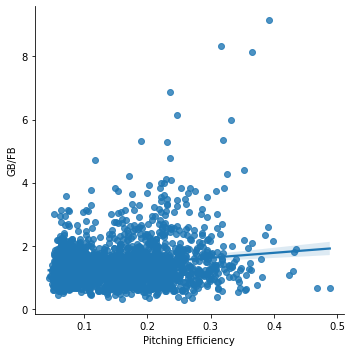

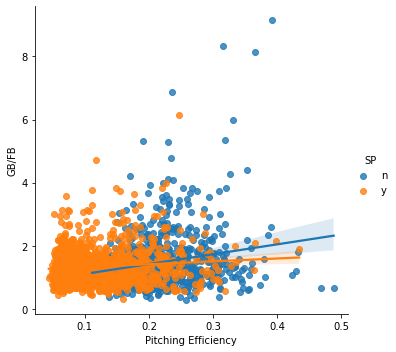

In [24]:
# Explore relationship between PE and GB/FB.
sns.lmplot(data = df, x='Pitching Efficiency', y='GB/FB')
sns.lmplot(data = df, x='Pitching Efficiency', y='GB/FB', hue = 'SP')


Due to flyball revolution, recent years more and more hitters are hit balls to air, which are bad to pitchers because that increases probability of extrabase hits.

GB/FB means ration of ground balls to fly balls. Higher number means more ground balls and less fly balls and good to pitchers.

A better pitcher (higher PE) should have higher GB/FB. These figures show that higher PE has higher GB/FB. Reliever has more positive correlation between PE and GB/FB.

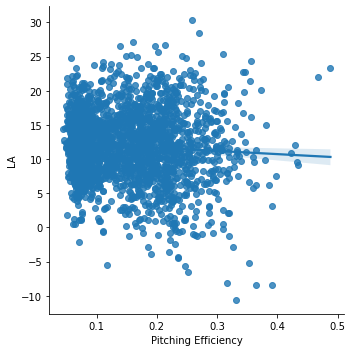

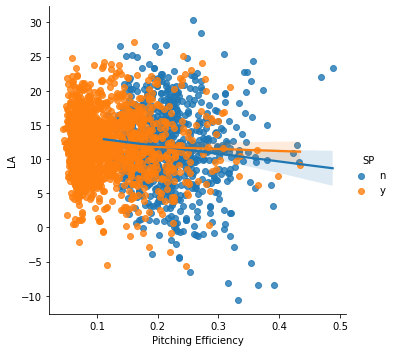

In [25]:
# Explore relationship between PE and launch angle.
sns.lmplot(data = df, x='Pitching Efficiency', y='LA')
sns.lmplot(data = df, x='Pitching Efficiency', y='LA', hue = 'SP')

We just see HR/9 and GB/FB. We found that higher PE has lower HR/9 and higher GB/FB.
Launch angle (LA) is the angle a hitter hit from a pitch.

Lower LA means a hitting ball goes to ground instead of air.

Because we saw that higher PE has lower HR/9 and higher GB/FB, here we should see higher EV have lower LA.
As a result, higher EV indeed have lower LA, which matches what we observed before.

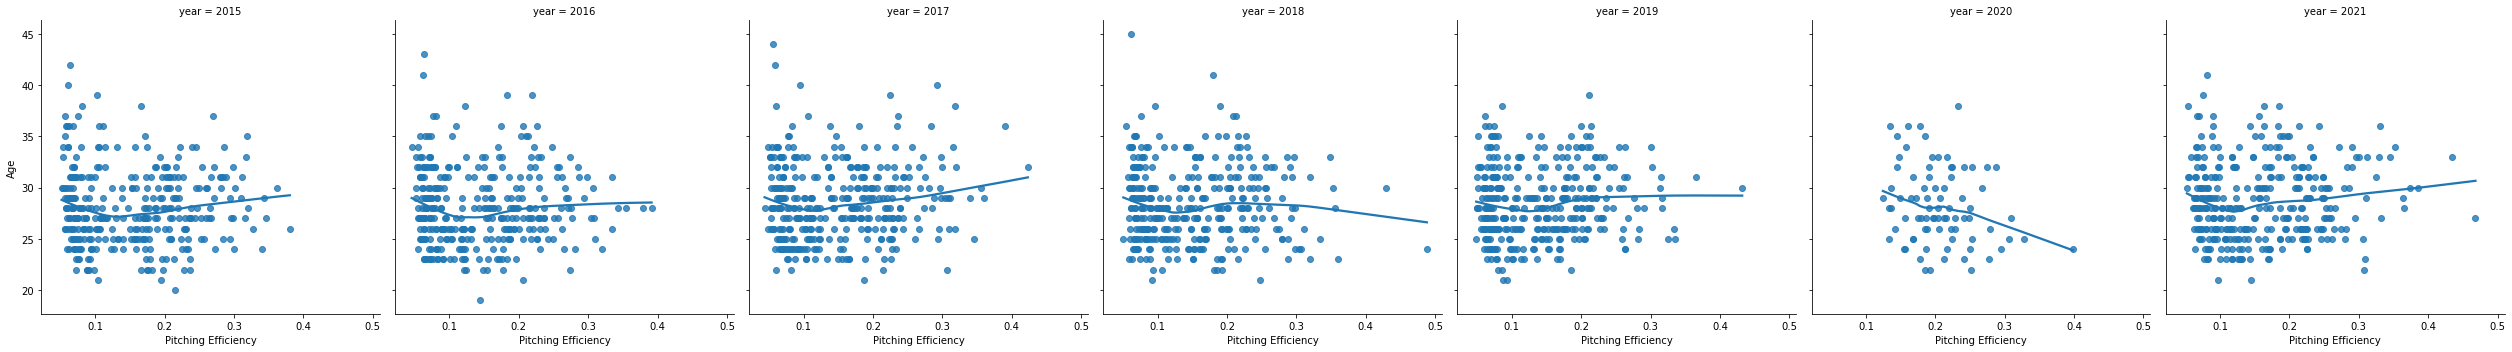

In [26]:
# Explore relationship between PE and Age.
sns.lmplot(data = df, x='Pitching Efficiency', y='Age', col = 'year', lowess=True)



Besides 2020, all other years have near flat or slightly upward trend line. It means PE has near zero correlation with age. 

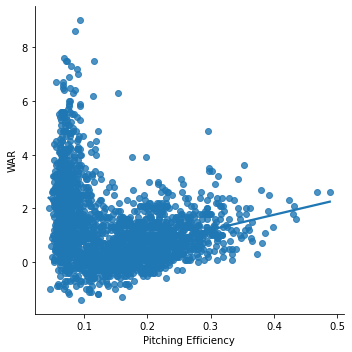

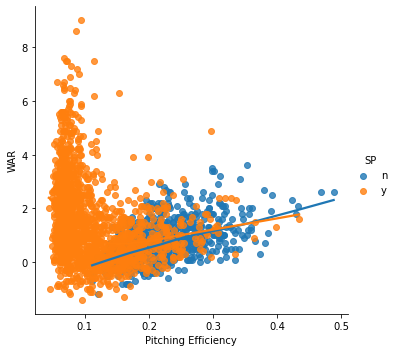

In [27]:
# Explore relationship between PE and WAR.
sns.lmplot(data = df, x='Pitching Efficiency', y='WAR', lowess=True)
sns.lmplot(data = df, x='Pitching Efficiency', y='WAR', hue = 'SP', lowess=True)



WAR measures a player's value in all facets of the game by deciphering how many more wins he's worth than a replacement-level player at his same position. Detailed explanation can go to https://www.mlb.com/glossary/advanced-stats/wins-above-replacement.

Higher WAR means a pitcher is more valuable.
A better pitcher (higher PE) should have higher WAR. These figures show that higher PE has higher WAR. Reliever has more positive correlation between PE and WAR.

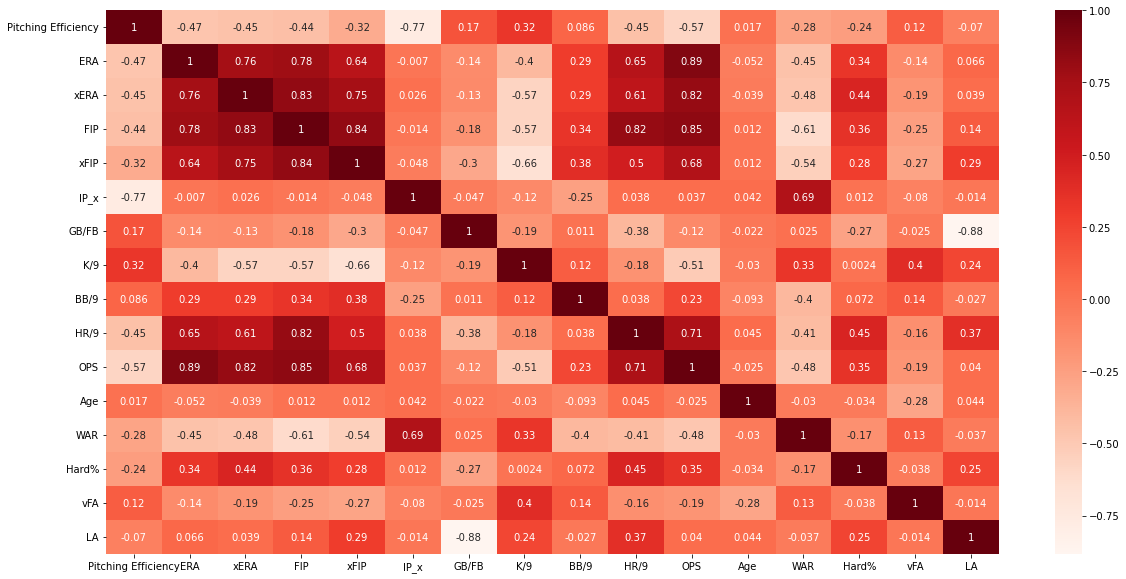

In [28]:
# Explore correlation between PE and other metrics.
cor = df[['Pitching Efficiency', 'ERA', 'xERA', 'FIP', 'xFIP', 'IP_x', 'GB/FB', 'K/9', 'BB/9', 'HR/9', 'OPS', 'Age', 'WAR', 'Hard%', 'vFA', 'LA']].corr()

plt.figure(figsize=(20, 10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


I also plotted the Pearson correlation heatmap and see the correlation between PE and metrics.

The correlation coefficient has values between -1 to 1

— A value closer to 0 implies weaker correlation (exact 0 implying no correlation)

— A value closer to 1 implies stronger positive correlation

— A value closer to -1 implies stronger negative correlation

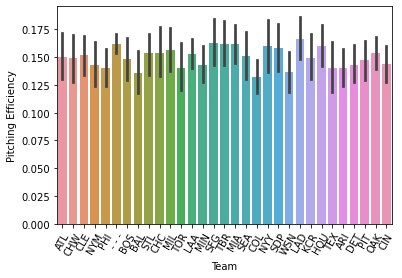

In [29]:
s = sns.barplot(data = df, x='Team', y = 'Pitching Efficiency')
for item in s.get_xticklabels():
    item.set_rotation(60)


From 2015 to 2021, teams with highest PE are LA Dodgers, SF Giants, and Tempa Bay Rays. This makes sense. For past 7 years, these teams are famous for their competative pitching rotations.

[Text(0.5, 1.0, 'Patrick Corbin')]

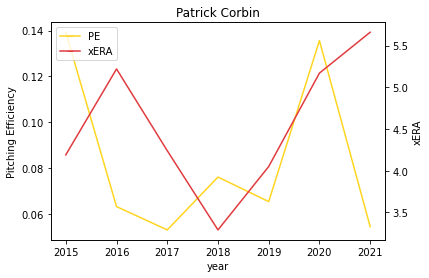

In [30]:
# Extract "Patrick Corbin" from the whole dataset
new_index = np.arange(7)
patrick_corbin = df[df['Name_x']=='Patrick Corbin']
#clay[clay.index.duplicated()]
patrick_corbin.set_index(new_index, inplace = True)

#Plot
g = sns.lineplot(data = patrick_corbin, x = 'year', y = 'Pitching Efficiency', color="#FFD520")
ax = g.twinx()
g = sns.lineplot(data = patrick_corbin, x = 'year', y = 'xERA', ax = ax, color="#E03A3E")
g.legend(handles=[Line2D([], [], marker='_', color="#FFD520", label='PE'), Line2D([], [], marker='_', color="#E03A3E", label='xERA')])
g.set(title='Patrick Corbin')


I use Patrick Corbin as an example. As we can see from the graph, Patrick's PE started to drop from 2015 and remained at low since then. xERA reflect Patrick's recession years later.

[Text(0.5, 1.0, 'Clayton Kershaw')]

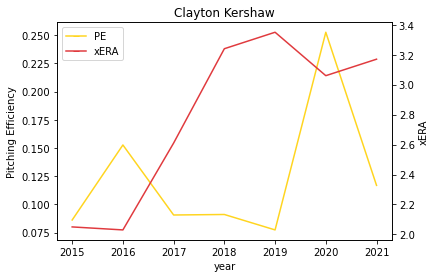

In [31]:
# Extract "Clayton Kershaw" from the whole dataset
new_index = np.arange(7)
clay = df[df['Name_x']=='Clayton Kershaw']
#clay[clay.index.duplicated()]
clay.set_index(new_index, inplace = True)

#Plot
g = sns.lineplot(data = clay, x = 'year', y = 'Pitching Efficiency', color="#FFD520")
ax = g.twinx()
g = sns.lineplot(data = clay, x = 'year', y = 'xERA', ax = ax, color="#E03A3E")
g.legend(handles=[Line2D([], [], marker='_', color="#FFD520", label='PE'), Line2D([], [], marker='_', color="#E03A3E", label='xERA')])
g.set(title='Clayton Kershaw')


Clayton Kershaw is another example. As we can see from the graph, Clayton's PE started to drop from 2016 and remained at low since then. xERA reflect Clayton's recession a year later.

### Summary
Pitiching Efficiency is a useful metric to evaluate pitcher's performance. It is eailsy to calculate and use. Compared to other metrics, PE covers more aspects of pitcher and can reflect more about pitcher's performance. 